### Feature Engineering Techniques
1. Encoding Categorical Variables
   - One-Hot Encoding
   - Label Encoding
   - Binary Encoding
2. Feature Splitting - Discussed in LAB 3 with SOLD_YEAR
4. Feature Scaling
   - Min-Max Scale
   - Standard Scale
5. Class Balancing - SMOTE


In [1]:
### Import necessary libraries
# Core data processing libraries
import pandas as pd # Data manipulation and analysis - essential for handling structured data
import numpy as np # Numerical operations and array handling - needed for mathematical operations

# Visualization libraries
import matplotlib.pyplot as plt # More control, lower-level, basic plotting - for custom plots
import seaborn as sns # Higher-level, more aesthetically pleasing plots - for statistical visualizations

# Statistical analysis
from scipy import stats # Statistical functions and tests - for hypothesis testing and distributions

# Display settings for better data exploration
pd.set_option('display.max_columns', None) # Display all columns in DataFrame output - see all features
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output - see complete data


In [2]:
# Load the dataset
# Using primary_features_boolean_converted_final.csv - this dataset contains:
# - Car specifications (year, mileage, engine, etc.)
# - Boolean features (safety features, luxury features)
# - Price information in Georgian Lari
# This dataset is ideal for feature engineering as it has both numerical and categorical features
df = pd.read_csv('primary_features_boolean_converted_final.csv')
df.shape  # Check dataset dimensions to understand data size


(122478, 44)

In [3]:
# Show basic statistics (first 10 rows to avoid truncation)
# describe() provides key statistical measures:
# - count: number of non-null values (helps identify missing data)
# - mean: average values (shows data distribution)
# - std: standard deviation (indicates data spread)
# - min/max: data range (helps identify outliers)
# We limit to 10 rows to avoid Jupyter output truncation
df.describe().transpose().head(10)


,count,mean,std,min,25%,50%,75%,max
app_id,122478.0,1.085292e+08,3.858681e+06,8907839.0,108824263.0,109256383.0,1.094396e+08,1.096066e+08
user_id,122478.0,3.505034e+06,1.690674e+06,7.0,3091978.0,3724305.0,4.796288e+06,5.533776e+06
mileage,122478.0,1.211309e+05,1.150288e+05,0.0,41600.0,104303.0,1.683130e+05,1.608998e+06
engine_volume,122478.0,2.376385e+03,1.356930e+03,0.0,1800.0,2000.0,3.000000e+03,2.000000e+04
product_year,122478.0,2.015056e+03,2.839979e+01,0.0,2013.0,2017.0,2.020000e+03,2.025000e+03
cylinders,122478.0,4.452612e+00,1.937836e+00,0.0,4.0,4.0,6.000000e+00,1.200000e+01
airbags,122478.0,8.876876e+00,4.176371e+00,0.0,6.0,12.0,1.200000e+01,1.200000e+01
price(Georgian Lari),122478.0,6.323576e+03,3.172948e+04,0.0,0.0,1800.0,7.800000e+03,8.388607e+06
price_value,122478.0,1.661124e+04,4.515809e+04,0.0,0.0,4359.0,2.098000e+04,8.388610e+06
predicted_price,122478.0,5.486316e+04,4.855712e+04,0.0,19072.9,40870.5,7.833512e+04,2.109681e+05


In [4]:
# Data preprocessing for better analysis
# Convert prices to thousands for better readability and numerical stability
# Large numbers can cause computational issues and are harder to interpret
df['price(Georgian Lari)'] = (df['price(Georgian Lari)']/1000).astype(int)

# Round mileage to 2 decimal places for consistency
# Mileage precision beyond 2 decimals is usually not meaningful for car analysis
df['mileage'] = df['mileage'].round(2)


In [5]:
# Display first 5 rows to understand data structure
# This helps us see:
# - Data types and formats
# - Sample values for each column
# - Potential data quality issues
df.head()


,app_id,user_id,user_status,fuel_type,gear,drive_type,door_type,color,saloon_color,manufacture,model,category,mileage,engine_volume,product_year,cylinders,airbags,location,saloon_material,price(Georgian Lari),price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price,ABS,Accessible for PWD,Air Conditioning,Alarm System,Central Locking,Central Screen (Navigation),Climate Control,Electric Side Mirros,ESP,Heated Seats,On-Board Computer,Parking Control,Rear View Camera,Rims,Start-Stop System,Steering Hydraulics,Sunroof
0,108687133,3468381,S-VIP,Petrol,Tiptronic,Front,4 or 5,Red,Black,Mazda,Mazda 3,Sedan,55600,2000,2021,4,6,Tbilisi,Leather,16,43595,True,47682.2500,42914.02500,76291.60000,25748.41500,91549.92000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,108608289,3468381,S-VIP,Petrol,Tiptronic,Front,4 or 5,Red,Black,Mazda,Mazda 3,Sedan,42500,2000,2019,4,6,Tbilisi,Leather,13,36783,True,40696.1192,36626.50728,65113.79072,21975.90437,78136.54886,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,106961361,901648,S-VIP,Petrol,Automatic,4x4,4 or 5,Black,Carnelian red,Land Rover,Range Rover,Jeep,38000,4400,2023,8,9,Tbilisi,Leather,134,365110,False,186641.9500,NaN,NaN,NaN,NaN,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,107494885,533348,S-VIP,Petrol,Tiptronic,Rear,2 or 3,Black,Black,Mercedes-Benz,SLC 300,Cabriolet,49600,2000,2016,4,6,Tbilisi,Leather,16,44957,True,79422.2803,71480.05227,127075.64850,42888.03136,152490.77820,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1
4,108126733,3141836,S-VIP,Diesel,Automatic,4x4,>5,Brown,Black,Ford,Ranger,Pickup,20200,3200,2021,4,12,Tbilisi,Leather,32,87190,True,98012.9084,88211.61756,156820.65340,52926.97054,188184.78410,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0


In [6]:
# Identify column types for feature engineering
# This is crucial because different feature types require different encoding strategies:
# - Numerical columns: can be used directly or scaled
# - Categorical columns: need encoding (label, one-hot, binary)
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)


Numerical columns: Index(['app_id', 'user_id', 'mileage', 'engine_volume', 'product_year',
       'cylinders', 'airbags', 'price(Georgian Lari)', 'price_value',
       'predicted_price', 'pred_first_breakpoint', 'pred_second_breakpoint',
       'pred_min_price', 'pred_max_price', 'ABS', 'Accessible for PWD',
       'Air Conditioning', 'Alarm System', 'Central Locking',
       'Central Screen (Navigation)', 'Climate Control',
       'Electric Side Mirros', 'ESP', 'Heated Seats', 'On-Board Computer',
       'Parking Control', 'Rear View Camera', 'Rims', 'Start-Stop System',
       'Steering Hydraulics', 'Sunroof'],
      dtype='object')
Categorical columns: Index(['user_status', 'fuel_type', 'gear', 'drive_type', 'door_type', 'color',
       'saloon_color', 'manufacture', 'model', 'category', 'location',
       'saloon_material'],
      dtype='object')


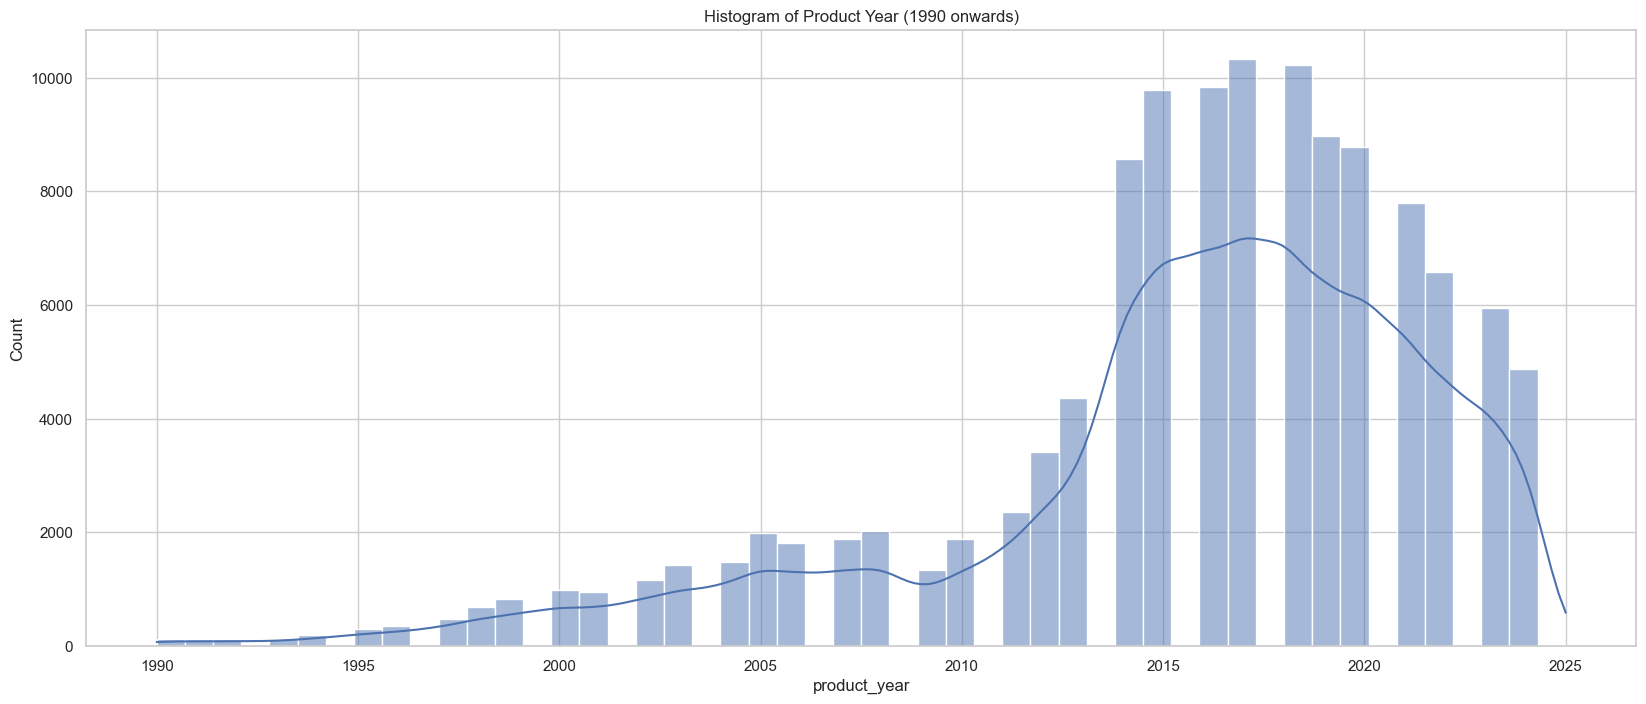

In [7]:
# Filter data from 1990 onwards (cars before 1990 have no trading value)
# Why filter from 1990?
# - Cars before 1990 are extremely rare in the market
# - They have no practical trading value for most buyers
# - Including them would create noise in our analysis
# - Modern car features (safety, technology) started becoming standard after 1990
df_filtered = df[df['product_year'] >= 1990].copy()  # Create proper copy to avoid warnings

# Visualize the distribution of product years
# This helps us understand:
# - Data distribution patterns
# - Identify any gaps or clusters in manufacturing years
# - Plan appropriate binning strategies for categorical encoding
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.histplot(df_filtered['product_year'], bins=50, kde=True)
plt.title("Histogram of Product Year (1990 onwards)")
plt.show()


In [8]:
# Categorizes product year (using filtered data from 1990 onwards)
# Why create year categories?
# - Car technology evolves in 5-year cycles (major updates every 5 years)
# - Different eras have different safety standards and features
# - Categorical encoding works better with meaningful groups than continuous years
# - Helps models understand technological generations rather than exact years
# Binning strategy: 5-year intervals capture major automotive technology generations
df_filtered.loc[:, 'PRODUCT_YEAR_CAT'] = pd.cut(
    df_filtered['product_year'], 
    bins=[1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025], 
    labels=['1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', '2020-2024']
)


In [9]:
# Show dataset info (summary only)
# This provides essential metadata for feature engineering decisions:
# - Dataset size: affects computational requirements and sampling strategies
# - Memory usage: helps plan for large-scale processing
# - Column count: indicates feature complexity
# - Missing values: critical for data quality assessment and imputation strategies
print(f"Dataset shape: {df_filtered.shape}")
print(f"Memory usage: {df_filtered.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"Columns: {len(df_filtered.columns)}")
print(f"Missing values: {df_filtered.isnull().sum().sum()}")


Dataset shape: (122036, 45)
Memory usage: 107.04 MB
Columns: 45
Missing values: 309995


In [10]:
# Show first 5 rows (key columns only)
key_columns = ['product_year', 'price(Georgian Lari)', 'mileage', 'engine_volume', 'fuel_type']
available_columns = [col for col in key_columns if col in df_filtered.columns]
df_filtered[available_columns].head()


,product_year,price(Georgian Lari),mileage,engine_volume,fuel_type
0,2021,16,55600,2000,Petrol
1,2019,13,42500,2000,Petrol
2,2023,134,38000,4400,Petrol
3,2016,16,49600,2000,Petrol
4,2021,32,20200,3200,Diesel


#### Label Encoding
- Simple and memory-efficient.
- Implies an ordinal relationship between categories (e.g., 2 > 0). which can mislead linear models.
- Works well with tree-based algorithms (e.g., decision trees, random forests).


In [11]:
# Label Encoding for categorical variables
# Why use Label Encoding?
# - Memory efficient: converts categories to integers (0, 1, 2, ...)
# - Good for tree-based algorithms (Random Forest, XGBoost)
# - Preserves ordinal relationships if they exist
# - Warning: implies ordinal relationship (2 > 1 > 0) which may not be true for all categories
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered.loc[:, 'PRODUCT_YEAR_CAT_LB'] = le.fit_transform(df_filtered['PRODUCT_YEAR_CAT'])


In [12]:
df_filtered[df_filtered['product_year'] < 2000].head()


,app_id,user_id,user_status,fuel_type,gear,drive_type,door_type,color,saloon_color,manufacture,model,category,mileage,engine_volume,product_year,cylinders,airbags,location,saloon_material,price(Georgian Lari),price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price,ABS,Accessible for PWD,Air Conditioning,Alarm System,Central Locking,Central Screen (Navigation),Climate Control,Electric Side Mirros,ESP,Heated Seats,On-Board Computer,Parking Control,Rear View Camera,Rims,Start-Stop System,Steering Hydraulics,Sunroof,PRODUCT_YEAR_CAT,PRODUCT_YEAR_CAT_LB
88,109528309,2311956,S-VIP,Petrol,Automatic,Rear,4 or 5,Black,Black,Mercedes-Benz,S 600,Sedan,94000,6000,1996,12,12,Tbilisi,Leather,20,54494,False,108674.6595,NaN,NaN,NaN,NaN,1,0,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1995-1999,1
285,109592397,5532871,S-VIP,Diesel,Manual,4x4,4 or 5,Black,Black,Nissan,Patrol,Jeep,180000,2800,1993,6,2,Kutaisi,Combined,8,23159,True,40870.5000,36783.45000,65392.80000,22070.070000,78471.360000,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1990-1994,0
668,108859177,4288588,VIP-Plus,CNG,Manual,Front,4 or 5,Black,Black,Volkswagen,Jetta,Sedan,240000,2000,1999,4,8,Rustavi,Fabric,1,4359,True,5449.4000,4904.46000,8719.04000,2942.676000,10462.848000,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1995-1999,1
724,109090009,4519463,VIP,Petrol,Automatic,Front,4 or 5,Golden,Grey,Cadillac,DE Ville,Sedan,300000,4600,1998,8,2,Tbilisi,Leather,6,18528,True,34058.7500,30652.87500,54494.00000,18391.725000,65392.800000,1,0,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1995-1999,1
879,108265837,888821,VIP,Petrol,Manual,Front,4 or 5,Grey,Grey,Chrysler,Voyager,Minivan,186351,2000,1997,4,2,Tbilisi,Fabric,2,5449,True,4078.8759,3670.98831,6526.20144,2202.592986,7831.441728,1,0,1,1,1,0,1,1,0,0,1,0,0,1,0,1,0,1995-1999,1


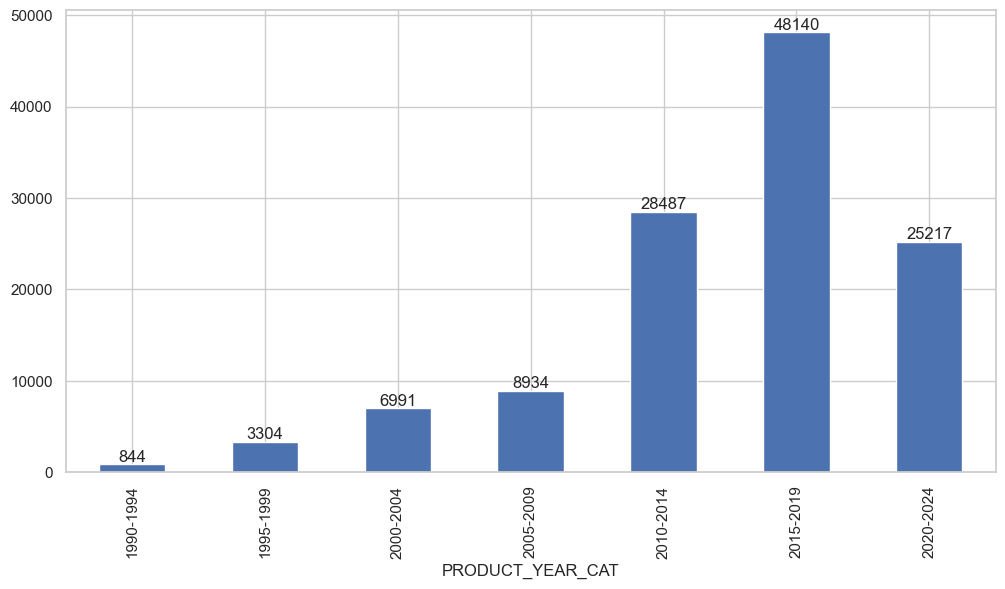

In [13]:
ax = df_filtered['PRODUCT_YEAR_CAT'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), int(p.get_height()), ha='center', va='bottom')


#### One-Hot-Encoding
- Doesn't imply any ordinal relationship.
- Safe for linear models (e.g., logistic regression).
- Increases dimensionality — can be problematic with high-cardinality features (many unique categories).


In [14]:
# One-Hot Encoding for categorical variables
# Why use One-Hot Encoding?
# - No ordinal relationship assumption: treats all categories equally
# - Safe for linear models (Logistic Regression, Linear Regression)
# - Each category gets its own binary column
# - Disadvantage: increases dimensionality significantly
# - Good for: when categories have no inherent order
one_hot_df = pd.get_dummies(df_filtered['PRODUCT_YEAR_CAT'], prefix='PRODUCT_YEAR_')
df_one_hot = pd.concat([df_filtered, one_hot_df], axis=1)
df_one_hot.head()


,app_id,user_id,user_status,fuel_type,gear,drive_type,door_type,color,saloon_color,manufacture,model,category,mileage,engine_volume,product_year,cylinders,airbags,location,saloon_material,price(Georgian Lari),price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price,ABS,Accessible for PWD,Air Conditioning,Alarm System,Central Locking,Central Screen (Navigation),Climate Control,Electric Side Mirros,ESP,Heated Seats,On-Board Computer,Parking Control,Rear View Camera,Rims,Start-Stop System,Steering Hydraulics,Sunroof,PRODUCT_YEAR_CAT,PRODUCT_YEAR_CAT_LB,PRODUCT_YEAR__1990-1994,PRODUCT_YEAR__1995-1999,PRODUCT_YEAR__2000-2004,PRODUCT_YEAR__2005-2009,PRODUCT_YEAR__2010-2014,PRODUCT_YEAR__2015-2019,PRODUCT_YEAR__2020-2024
0,108687133,3468381,S-VIP,Petrol,Tiptronic,Front,4 or 5,Red,Black,Mazda,Mazda 3,Sedan,55600,2000,2021,4,6,Tbilisi,Leather,16,43595,True,47682.2500,42914.02500,76291.60000,25748.41500,91549.92000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,2020-2024,6,False,False,False,False,False,False,True
1,108608289,3468381,S-VIP,Petrol,Tiptronic,Front,4 or 5,Red,Black,Mazda,Mazda 3,Sedan,42500,2000,2019,4,6,Tbilisi,Leather,13,36783,True,40696.1192,36626.50728,65113.79072,21975.90437,78136.54886,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2015-2019,5,False,False,False,False,False,True,False
2,106961361,901648,S-VIP,Petrol,Automatic,4x4,4 or 5,Black,Carnelian red,Land Rover,Range Rover,Jeep,38000,4400,2023,8,9,Tbilisi,Leather,134,365110,False,186641.9500,NaN,NaN,NaN,NaN,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2020-2024,6,False,False,False,False,False,False,True
3,107494885,533348,S-VIP,Petrol,Tiptronic,Rear,2 or 3,Black,Black,Mercedes-Benz,SLC 300,Cabriolet,49600,2000,2016,4,6,Tbilisi,Leather,16,44957,True,79422.2803,71480.05227,127075.64850,42888.03136,152490.77820,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,2015-2019,5,False,False,False,False,False,True,False
4,108126733,3141836,S-VIP,Diesel,Automatic,4x4,>5,Brown,Black,Ford,Ranger,Pickup,20200,3200,2021,4,12,Tbilisi,Leather,32,87190,True,98012.9084,88211.61756,156820.65340,52926.97054,188184.78410,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,2020-2024,6,False,False,False,False,False,False,True


#### Binary Encoding
 - Reduces dimensionality compared to One-Hot Encoding.
 - Good for high-cardinality features.
 - Not always suitable for all models.

<pre>STEP 1: Label Encoding. Assign integer IDs to categories

    | PRODUCT_YEAR_CAT | Label |
    | ---------------| ----- |
    | 1990-1994      | 0     |
    | 1995-1999      | 1     |
    | 2000-2004      | 2     |
    | 2005-2009      | 3     |
    | 2010-2014      | 4     |
    | 2015-2019      | 5     |
    | 2020-2024      | 6     |


STEP 2: Convert labels to binary (in 3 bits because log₂(7) ~ 2.8 --> round up 3)

    | Label | Binary |
    | ------| -------|
    | 0     | 000    |
    | 1     | 001    |
    | 2     | 010    |
    | 3     | 011    |
    | 4     | 100    |
    | 5     | 101    |
    | 6     | 110    |

STEP 3: Create binary columns

    | Binary_0 | Binary_1 | Binary_2 |
    | -------- | -------- | -------- |
    | 0        | 0        | 0        |
    | 0        | 0        | 1        |
    | 0        | 1        | 0        |
    | 0        | 1        | 1        |
    | 1        | 0        | 0        |
    | 1        | 0        | 1        |
    | 1        | 1        | 0        |
</pre>


In [15]:
# Binary Encoding implementation (using sklearn)
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create a proper copy to avoid SettingWithCopyWarning
df_binary_work = df_filtered.copy()

# First, label encode the categorical variable
le_binary = LabelEncoder()
df_binary_work['PRODUCT_YEAR_CAT_LE'] = le_binary.fit_transform(df_binary_work['PRODUCT_YEAR_CAT'])

# Convert to binary representation
def to_binary_columns(series, prefix='PRODUCT_YEAR_BINARY'):
    """Convert a series of integers to binary columns"""
    max_val = series.max()
    n_bits = int(np.ceil(np.log2(max_val + 1)))
    
    binary_cols = {}
    for i in range(n_bits):
        col_name = f'{prefix}_{i}'
        # Convert to numpy array for bit operations
        binary_cols[col_name] = (series.values >> i) & 1
    
    return pd.DataFrame(binary_cols)

# Apply binary encoding
binary_df = to_binary_columns(df_binary_work['PRODUCT_YEAR_CAT_LE'])
df_binary = pd.concat([df_binary_work, binary_df], axis=1)
df_binary.head()


,app_id,user_id,user_status,fuel_type,gear,drive_type,door_type,color,saloon_color,manufacture,model,category,mileage,engine_volume,product_year,cylinders,airbags,location,saloon_material,price(Georgian Lari),price_value,has_predicted_price,predicted_price,pred_first_breakpoint,pred_second_breakpoint,pred_min_price,pred_max_price,ABS,Accessible for PWD,Air Conditioning,Alarm System,Central Locking,Central Screen (Navigation),Climate Control,Electric Side Mirros,ESP,Heated Seats,On-Board Computer,Parking Control,Rear View Camera,Rims,Start-Stop System,Steering Hydraulics,Sunroof,PRODUCT_YEAR_CAT,PRODUCT_YEAR_CAT_LB,PRODUCT_YEAR_CAT_LE,PRODUCT_YEAR_BINARY_0,PRODUCT_YEAR_BINARY_1,PRODUCT_YEAR_BINARY_2
0,108687133.0,3468381.0,S-VIP,Petrol,Tiptronic,Front,4 or 5,Red,Black,Mazda,Mazda 3,Sedan,55600.0,2000.0,2021.0,4.0,6.0,Tbilisi,Leather,16.0,43595.0,True,47682.2500,42914.02500,76291.60000,25748.41500,91549.92000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2020-2024,6.0,6.0,0.0,1.0,1.0
1,108608289.0,3468381.0,S-VIP,Petrol,Tiptronic,Front,4 or 5,Red,Black,Mazda,Mazda 3,Sedan,42500.0,2000.0,2019.0,4.0,6.0,Tbilisi,Leather,13.0,36783.0,True,40696.1192,36626.50728,65113.79072,21975.90437,78136.54886,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-2019,5.0,5.0,1.0,0.0,1.0
2,106961361.0,901648.0,S-VIP,Petrol,Automatic,4x4,4 or 5,Black,Carnelian red,Land Rover,Range Rover,Jeep,38000.0,4400.0,2023.0,8.0,9.0,Tbilisi,Leather,134.0,365110.0,False,186641.9500,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2020-2024,6.0,6.0,0.0,1.0,1.0
3,107494885.0,533348.0,S-VIP,Petrol,Tiptronic,Rear,2 or 3,Black,Black,Mercedes-Benz,SLC 300,Cabriolet,49600.0,2000.0,2016.0,4.0,6.0,Tbilisi,Leather,16.0,44957.0,True,79422.2803,71480.05227,127075.64850,42888.03136,152490.77820,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,2015-2019,5.0,5.0,1.0,0.0,1.0
4,108126733.0,3141836.0,S-VIP,Diesel,Automatic,4x4,>5,Brown,Black,Ford,Ranger,Pickup,20200.0,3200.0,2021.0,4.0,12.0,Tbilisi,Leather,32.0,87190.0,True,98012.9084,88211.61756,156820.65340,52926.97054,188184.78410,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2020-2024,6.0,6.0,0.0,1.0,1.0


#### Feature Scaling
- **Min-Max Scaling**: Scales features to a range [0, 1]
- **Standard Scaling**: Scales features to have mean=0 and std=1
- Important for algorithms that are sensitive to feature scales


In [16]:
# Feature Scaling for numerical variables
# Why scale features?
# - Different features have different scales (price: thousands, mileage: tens of thousands)
# - Machine learning algorithms are sensitive to feature scales
# - Scaling ensures all features contribute equally to the model
# - Prevents features with larger scales from dominating the model

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numerical features for scaling
# These features have different scales and units:
# - price: thousands of currency units
# - mileage: kilometers traveled
# - engine_volume: liters
# - cylinders: count (1-12)
# - airbags: count (0-10+)
numerical_features = ['price(Georgian Lari)', 'mileage', 'engine_volume', 'cylinders', 'airbags']
X_numerical = df_filtered[numerical_features].fillna(0)

# Min-Max Scaling: scales features to [0, 1] range
# Why Min-Max?
# - Preserves original distribution shape
# - Good when you know the data bounds
# - Sensitive to outliers
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_numerical)
X_minmax_df = pd.DataFrame(X_minmax, columns=numerical_features)

print("Min-Max Scaled Features:")
print(X_minmax_df.head())


Min-Max Scaled Features:
   price(Georgian Lari)   mileage  engine_volume  cylinders  airbags
0              0.001907  0.034556           0.10   0.333333     0.50
1              0.001550  0.026414           0.10   0.333333     0.50
2              0.015975  0.023617           0.22   0.666667     0.75
3              0.001907  0.030827           0.10   0.333333     0.50
4              0.003815  0.012554           0.16   0.333333     1.00


In [17]:
# Standard Scaling: scales features to mean=0, std=1
# Why Standard Scaling?
# - Assumes normal distribution
# - Less sensitive to outliers than Min-Max
# - Good for algorithms that assume normal distribution
# - Centers data around zero
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X_numerical)
X_standard_df = pd.DataFrame(X_standard, columns=numerical_features)

print("Standard Scaled Features:")
print(X_standard_df.head())


Standard Scaled Features:
   price(Georgian Lari)   mileage  engine_volume  cylinders   airbags
0              0.311398 -0.571663      -0.277268  -0.233418 -0.696307
1              0.216946 -0.685868      -0.277268  -0.233418 -0.696307
2              4.026513 -0.725099       1.501764   1.834453  0.024561
3              0.311398 -0.623971      -0.277268  -0.233418 -0.696307
4              0.815143 -0.880279       0.612248  -0.233418  0.745430


#### Class Balancing - SMOTE
- **SMOTE (Synthetic Minority Oversampling Technique)**: Generates synthetic samples for minority classes
- Helps with imbalanced datasets
- Creates new samples by interpolating between existing minority class samples


In [18]:
# Create target variable for classification
# Why create price categories?
# - Converts regression problem to classification
# - Easier to understand and interpret results
# - Allows for class balancing techniques (SMOTE)
# - Three categories: Low, Medium, High (tertiles)
df_filtered.loc[:, 'price_category'] = pd.cut(df_filtered['price(Georgian Lari)'], bins=3, labels=['Low', 'Medium', 'High'])

# Check class distribution
# This is crucial for SMOTE - we need to see if classes are imbalanced
print("Class distribution before SMOTE:")
print(df_filtered['price_category'].value_counts())

# Prepare features for SMOTE
# Select numerical features that will be used for synthetic sample generation
X_features = df_filtered[numerical_features].fillna(0)
y_target = df_filtered['price_category']

print(f"\nDataset shape: {X_features.shape}")
print(f"Target classes: {y_target.value_counts().to_dict()}")


Class distribution before SMOTE:
price_category
Low       122034
Medium         1
High           1
Name: count, dtype: int64

Dataset shape: (122036, 5)
Target classes: {'Low': 122034, 'Medium': 1, 'High': 1}


In [19]:
# SMOTE (Synthetic Minority Oversampling Technique) for class balancing
# Why use SMOTE?
# - Imbalanced datasets can bias models toward majority class
# - SMOTE creates synthetic samples for minority classes
# - Uses interpolation between existing minority samples
# - Helps models learn from all classes equally
# - Better than simple oversampling (avoids exact duplicates)

from imblearn.over_sampling import SMOTE

# Check if we have enough samples for SMOTE
# SMOTE requires at least 2 samples per class and at least 2 classes
print("Checking class distribution:")
class_counts = y_target.value_counts()
print(class_counts)

# Only apply SMOTE if we have enough samples
if len(class_counts) >= 2 and class_counts.min() >= 2:
    try:
        # Apply SMOTE
        # random_state=42 ensures reproducible results
        smote = SMOTE(random_state=42)
        X_smote, y_smote = smote.fit_resample(X_features, y_target)
        
        print("\nClass distribution after SMOTE:")
        print(pd.Series(y_smote).value_counts())
        print(f"\nDataset shape after SMOTE: {X_smote.shape}")
    except Exception as e:
        print(f"\nSMOTE failed: {e}")
        print("Using original data without SMOTE")
        X_smote, y_smote = X_features, y_target
else:
    print("\nNot enough samples for SMOTE. Using original data.")
    X_smote, y_smote = X_features, y_target


Checking class distribution:
price_category
Low       122034
Medium         1
High           1
Name: count, dtype: int64

Not enough samples for SMOTE. Using original data.


## Summary

### Feature Engineering Techniques Applied:

1. **Categorical Encoding**:
   - **Label Encoding**: Simple, memory-efficient, good for tree-based algorithms
   - **One-Hot Encoding**: Safe for linear models, increases dimensionality
   - **Binary Encoding**: Reduces dimensionality, good for high-cardinality features

2. **Feature Scaling**:
   - **Min-Max Scaling**: Scales to [0, 1] range
   - **Standard Scaling**: Normalizes to mean=0, std=1

3. **Class Balancing**:
   - **SMOTE**: Generates synthetic samples for minority classes

### Best Practices:
- Choose encoding method based on model type and feature cardinality
- Always scale features for distance-based algorithms
- Use SMOTE for imbalanced datasets
- Validate results with cross-validation
